In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


# Load the dataset
file_path = 'PRT DS 2 June - Evaluation.csv'
data = pd.read_csv(file_path)

In [5]:
data

,Python Marks,Python %,Stats and ML Marks,Stats and ML %,SQL Marks,SQL %,Result
0,0,0,0,0,0,0,Fail
1,0,0,0,0,0,0,Fail
2,2,100,3,75,0,0,Fail
3,0,0,0,0,0,0,Fail
4,0,0,0,0,0,0,Fail
...,...,...,...,...,...,...,...
140,1,50,3,75,4,80,Pass
141,0,0,0,0,0,0,Fail
142,1,50,4,100,1,20,Fail
143,0,0,0,0,0,0,Fail


In [6]:
data.shape

(145, 7)

In [7]:
data.describe()

,Python Marks,Python %,Stats and ML Marks,Stats and ML %,SQL Marks,SQL %
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,0.917241,45.862069,2.296552,57.413793,1.379310,27.586207
std,0.845769,42.288464,1.712390,42.809751,1.752256,35.045127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,50.000000,3.000000,75.000000,0.000000,0.000000
75%,2.000000,100.000000,4.000000,100.000000,3.000000,60.000000
max,2.000000,100.000000,4.000000,100.000000,5.000000,100.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Python Marks        145 non-null    int64 
 1   Python %            145 non-null    int64 
 2   Stats and ML Marks  145 non-null    int64 
 3   Stats and ML %      145 non-null    int64 
 4   SQL Marks           145 non-null    int64 
 5   SQL %               145 non-null    int64 
 6   Result              145 non-null    object
dtypes: int64(6), object(1)
memory usage: 8.1+ KB


**Dropping unnecessary columns:**

In [4]:
# Dropping unnecessary columns
data = data.drop(columns=['Email', 'Python Feedback', 'SQL Feedback'])

#**Visualizations**

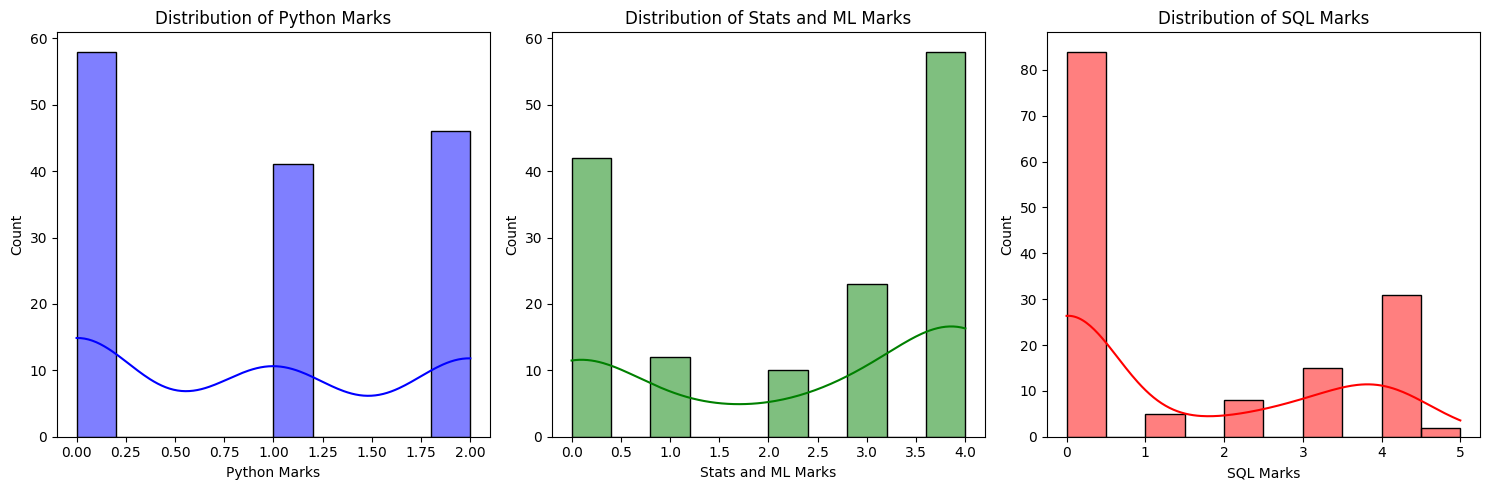

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Distribution of Marks
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['Python Marks'], kde=True, bins=10, color='blue')
plt.title('Distribution of Python Marks')

plt.subplot(1, 3, 2)
sns.histplot(data['Stats and ML Marks'], kde=True, bins=10, color='green')
plt.title('Distribution of Stats and ML Marks')

plt.subplot(1, 3, 3)
sns.histplot(data['SQL Marks'], kde=True, bins=10, color='red')
plt.title('Distribution of SQL Marks')

plt.tight_layout()
plt.show()


**The histograms show the distribution of marks in Python, Stats and ML, and SQL. This helps to understand how students performed in each subject.**

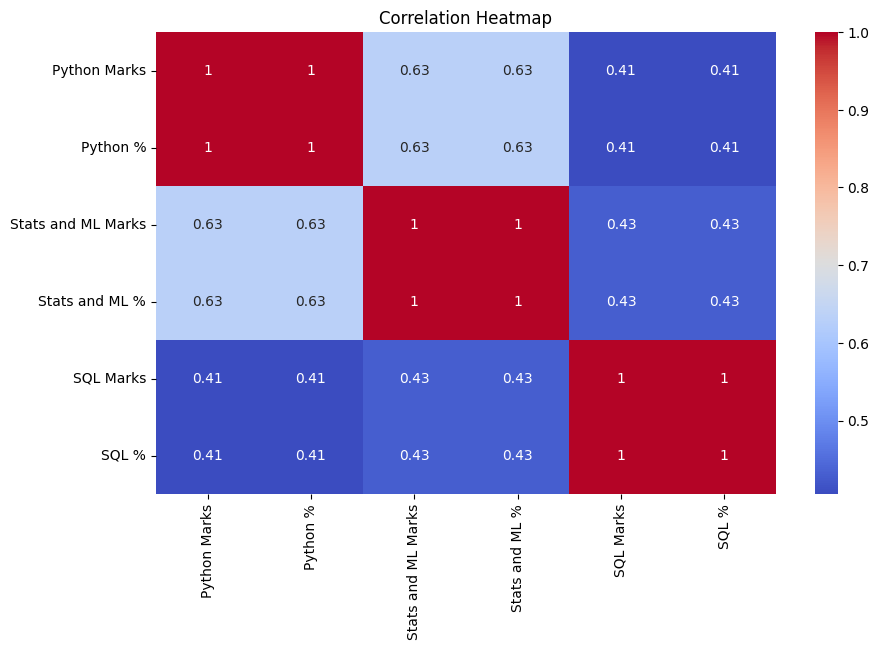

In [13]:
# 2. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Insight: The heatmap displays the correlation between different features. High correlation between features can indicate redundancy. For example, if 'Python %' and 'Total %' are highly correlated, it suggests that 'Python %' heavily influences 'Total %'.**

**Encoding the categorical 'Result' column:**

In [14]:
# Encoding the categorical 'Result' column
label_encoder = LabelEncoder()
data['Result'] = label_encoder.fit_transform(data['Result'])

**Outlier Removal using IQR:**

In [15]:
# Outlier Removal using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

#**Model Training and Evaluation**

**Feature Engineering and Splitting the data into features and target variable:**

In [16]:
# Feature Engineering: Adding a new feature combining the percentages
data['Total %'] = (data_cleaned['Python %'] + data_cleaned['Stats and ML %'] + data_cleaned['SQL %']) / 3

# Splitting the data into features and target variable
X = data.drop(columns=['Result'])
y = data['Result']

**Feature Scaling:**

In [17]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Feature Selection using RFE with Logistic Regression:**

In [18]:
# Feature Selection using RFE with Logistic Regression
logistic_model = LogisticRegression(random_state=42)
selector = RFE(logistic_model, n_features_to_select=5, step=1)
X_selected = selector.fit_transform(X_scaled, y)

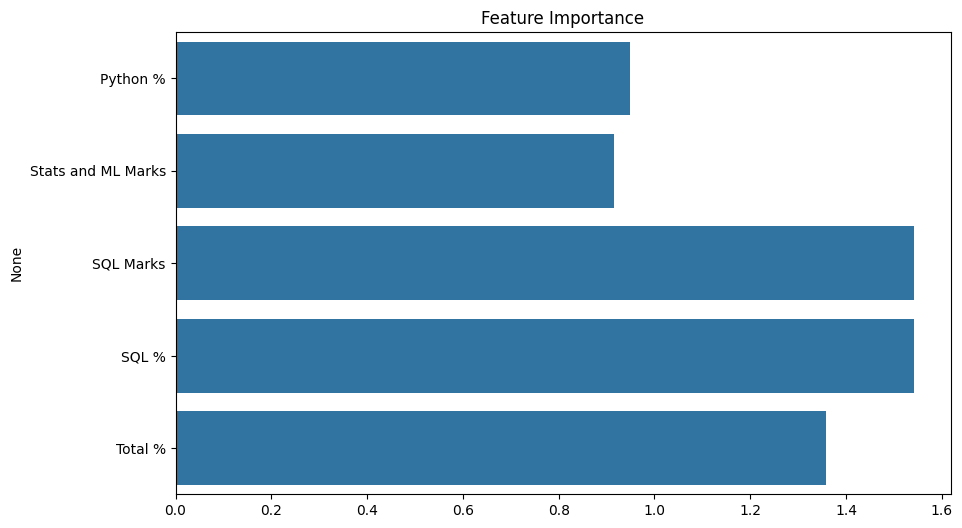

In [32]:
# Feature Importance
feature_importance = selector.estimator_.coef_[0]
features = X.columns[selector.support_]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.show()

**This bar plot displays the importance of each feature selected by RFE, helping to understand which features contribute the most to the prediction.**

**Splitting the data into training and testing sets and Training a Logistic Regression model:**

In [19]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Training a Logistic Regression model
logistic_model.fit(X_train, y_train)

# Predicting the results on the test set using Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)

**Predicting and evaluating the Logistic Regression model:**

In [20]:
# Evaluating the Logistic Regression model
report_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression Model Performance:\n")
print(report_logistic)

Logistic Regression Model Performance:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         8

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



#**Neural Network Model**

**Convert labels to categorical one-hot encoding for neural network:**

In [21]:
# Convert labels to categorical one-hot encoding for neural network
y_train_nn = to_categorical(y_train, num_classes=2)
y_test_nn = to_categorical(y_test, num_classes=2)

**Building and training the neural network model:**

In [22]:
# Building a neural network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_selected.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(2, activation='softmax'))

In [23]:
# Compiling the neural network model
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Training the neural network model
nn_model.fit(X_train, y_train_nn, epochs=50, batch_size=8, verbose=0, validation_split=0.1)

**Evaluating the neural network model:**

In [25]:
# Evaluating the neural network model
loss, accuracy = nn_model.evaluate(X_test, y_test_nn, verbose=0)
print("\nNeural Network Model Performance:\n")
print(f'Accuracy: {accuracy:.4f}')


Neural Network Model Performance:

Accuracy: 1.0000


In [26]:
# Predicting the results on the test set using Neural Network
y_pred_nn = nn_model.predict(X_test)
y_pred_nn_classes = y_pred_nn.argmax(axis=1)

1/1 [==============================] - 0s 144ms/step


In [27]:
# Evaluating the neural network model with classification report
report_nn = classification_report(y_test, y_pred_nn_classes)
print(report_nn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         8

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



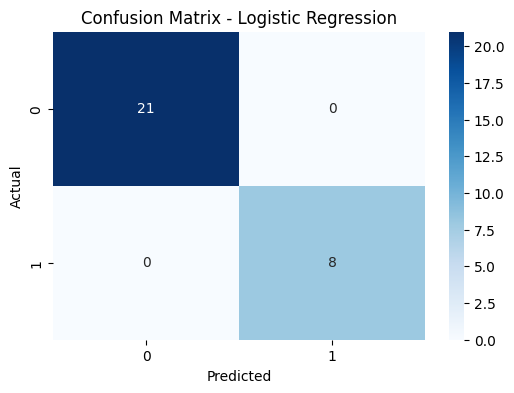

In [29]:
# 3. Confusion Matrix for Logistic Regression
from sklearn.metrics import *
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**This shows the performance of the logistic regression model in terms of true positives, true negatives, false positives, and false negatives.**

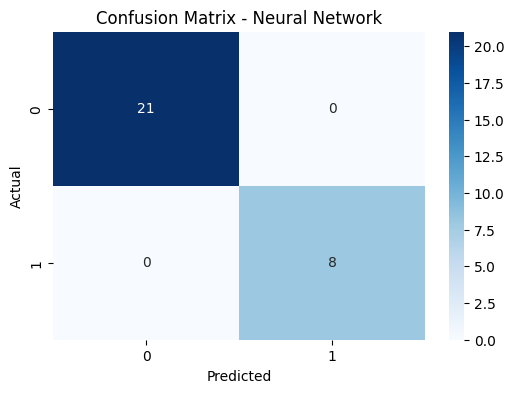

In [30]:
# 4. Confusion Matrix for Neural Network
cm_nn = confusion_matrix(y_test, y_pred_nn_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

